### Import Library yang digunakan untuk melakukan tensorflow

In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

### Klasifikasi dengan dataset Tensorflow malaria

In [2]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load(
    "malaria",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True
)

### Encoding label pada gambar didataset dengan menggunakan 2 class

In [3]:
num_class = 2
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test  = tf.keras.utils.to_categorical(y_test_raw, num_class)

### Menampilkan gambar dataset

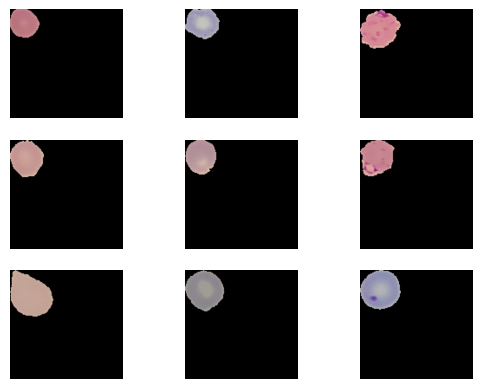

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

### Menampilkan Shape dari dataset 

In [5]:
x_train_raw.shape, x_test_raw.shape

(TensorShape([19291, 382, 394, 3]), TensorShape([8267, 382, 394, 3]))

### Konversi 28x28 menjadi sebuah vektor yang berukuran 2352x1 

In [6]:
training = tf.image.resize(x_train_raw, (28,28))
testing = tf.image.resize(x_test_raw, (28,28))

### Menentukan jumlah dimensi training dan testing 2D dengan menggunakan shape sebelmunya

In [7]:
training = np.reshape(training.numpy(), (19291,  2352))
testing = np.reshape(testing.numpy(), (8267,  2352))

In [8]:
training = training.astype('float32')/255
testing = testing.astype('float32')/255

In [9]:
model = Sequential([
        Dense(256, activation='relu', input_dim = (2352)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
        ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               602368    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 643,650
Trainable params: 643,650
Non-trainable params: 0
_________________________________________________________________


### Optimalisasi Model

In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Melakukan training pada model dengan batch size 32 dan epoch sebanyak 52

In [12]:
hist = model.fit(training, y_train, batch_size=32, epochs=52, 
                 validation_data=(testing, y_test))

Epoch 1/52
603/603 [==============================] - 5s 6ms/step - loss: 0.6756 - accuracy: 0.5770 - val_loss: 0.6568 - val_accuracy: 0.6277
Epoch 2/52
603/603 [==============================] - 3s 6ms/step - loss: 0.6529 - accuracy: 0.6233 - val_loss: 0.6343 - val_accuracy: 0.6474
Epoch 3/52
603/603 [==============================] - 3s 6ms/step - loss: 0.6369 - accuracy: 0.6395 - val_loss: 0.6166 - val_accuracy: 0.6635
Epoch 4/52
603/603 [==============================] - 4s 6ms/step - loss: 0.6261 - accuracy: 0.6553 - val_loss: 0.6070 - val_accuracy: 0.6815
Epoch 5/52
603/603 [==============================] - 3s 6ms/step - loss: 0.6202 - accuracy: 0.6612 - val_loss: 0.6016 - val_accuracy: 0.6824
Epoch 6/52
603/603 [==============================] - 3s 6ms/step - loss: 0.6134 - accuracy: 0.6685 - val_loss: 0.6081 - val_accuracy: 0.6732
Epoch 7/52
603/603 [==============================] - 3s 5ms/step - loss: 0.6083 - accuracy: 0.6760 - val_loss: 0.5921 - val_accuracy: 0.6899
Epoch 

### Evaluasi 

In [13]:
score = model.evaluate(testing, y_test)
print("TEST LOSS           : ", score [0])
print("TEST ACCURACY       : ", score [1])
print("VALIDATION LOSS     : ", hist.history['val_loss'][-1])
print("VALIDATION ACCURACY : ", hist.history['val_accuracy'][-1])

259/259 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.7867
TEST LOSS           :  0.4523838758468628
TEST ACCURACY       :  0.7867424488067627
VALIDATION LOSS     :  0.4523838758468628
VALIDATION ACCURACY :  0.7867424488067627


In [14]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Perbandingan validasi Loss dan loss dengan accuracy dan validasi accuracy

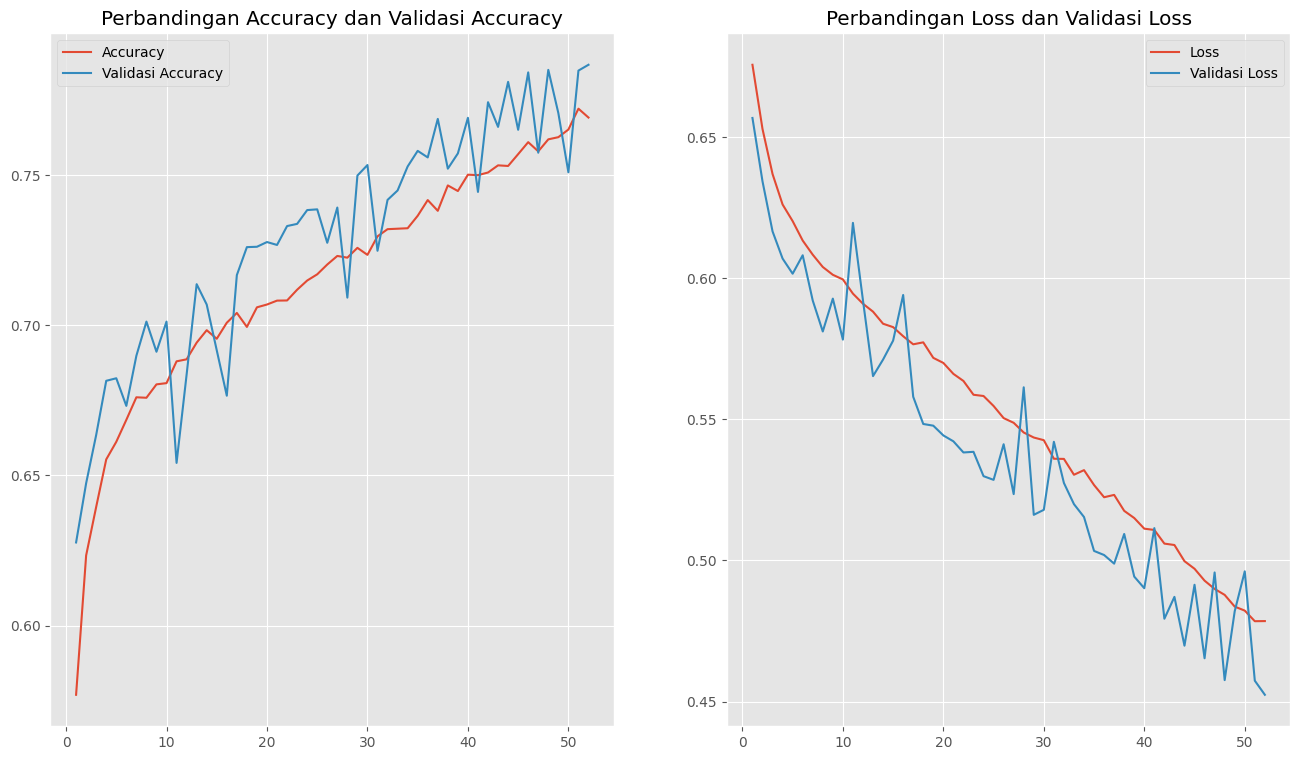

In [21]:
plt.figure(figsize=(16,9))

epochs_run = [i+1 for i in range(52)]

plt.subplot(1,2,1)
plt.plot(epochs_run, hist.history['accuracy'], label='Accuracy')
plt.plot(epochs_run, hist.history['val_accuracy'], label='Validasi Accuracy')
plt.title("Perbandingan Accuracy dan Validasi Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_run, hist.history['loss'], label='Loss')
plt.plot(epochs_run, hist.history['val_loss'], label='Validasi Loss')
plt.title("Perbandingan Loss dan Validasi Loss")
plt.legend()


plt.show()